In [101]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fft, fftshift, fftfreq	# FFT and helper functions
import numpy as np

sample_rate, samples = wavfile.read('41.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

dt = times[2] - times[1]
fs = 1/dt
print("Num of samples: ",len(samples))
print("fs: ",sample_rate)
print(1/dt)

Num of samples:  5856000
fs:  32000
142.85714285714286


In [102]:
def plot_spectrogram(x, t, fs, n_segment, f_max):
    """Plot spectrogram of signal x.

    Parameters
    ----------
    x: array of floats
        Signal in time-domain
    t: Numpy array of floats
        Time vector for x
    fs: float
        Sample rate [Samples/s]
    n_segmend: int
        No. of samples in segment for spctrogram calculation
    f_max: float
        Max. on frequency axis
    """
    # Configure spectrogram
    s_min = -50       # Minimum on the intensity plot. Lower values are 'black'
		
    # Calculate spectrogram
    f, t, sx = signal.spectrogram(x, fs, nperseg=n_segment, detrend=False)
    sx_db = 10*np.log10(sx/sx.max())   # Convert to dB
    		
    # Plot spectrogram
    plt.figure(figsize=(16, 6))  # Define figure for results	
    plt.subplot(1, 1, 1)
    
    plt.pcolormesh(t, f, sx_db, vmin=s_min, cmap='inferno')  # Draw spectrogram image
    		
    plt.xlabel("Time [s]")         # Axis labels and scales
    plt.ylabel("Frequency [Hz]")
    plt.ylim(0, f_max)
    		
    plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale

    return 0

In [103]:
def plot_spectrum(x, fs, fmax):
    """Plot Fourier coefficients of signal x.

    Parameters
    ----------
    x: array of float
        Signal in time-domain
    fs: float
        Sample rate [Samples/s]
    fmax : float
        Maximum on frequency axis
    """
    n_samples = len(x)            # No. of samples in signal
    ft_x = fft(x)/n_samples       # Fourier coefficients, correctly scaled
    f = fftfreq(n_samples, 1/fs)  # Frequency vector
    f = fftshift(f)               # Move negative frequencies to start
    ft_x = fftshift(ft_x)

    # Plot Fourier coefficients
    plt.figure(figsize=([16, 4]))	 # Define figure for plots

    plt.subplot(1, 2, 1)          # Subplot for magnitudes
    plt.stem(f, np.abs(ft_x))	  # Magnitude of spectral components as stem-plot
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.xlim(-fmax, fmax)
    plt.grid(True)

    plt.subplot(1, 2, 2)          # Subplot for phase
    plt.stem(f, np.angle(ft_x))	  # Phase of spectral components as stem-plot
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Phase [radians]")
    plt.grid(True)
    plt.xlim(-fmax, fmax)
    
    return 0

In [104]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

/var/folders/zg/23sg06wj2kzb1l0qdkk5tr140000gn/T/ipykernel_37467/827158856.py:22: RuntimeWarning: divide by zero encountered in log10
  sx_db = 10*np.log10(sx/sx.max())   # Convert to dB


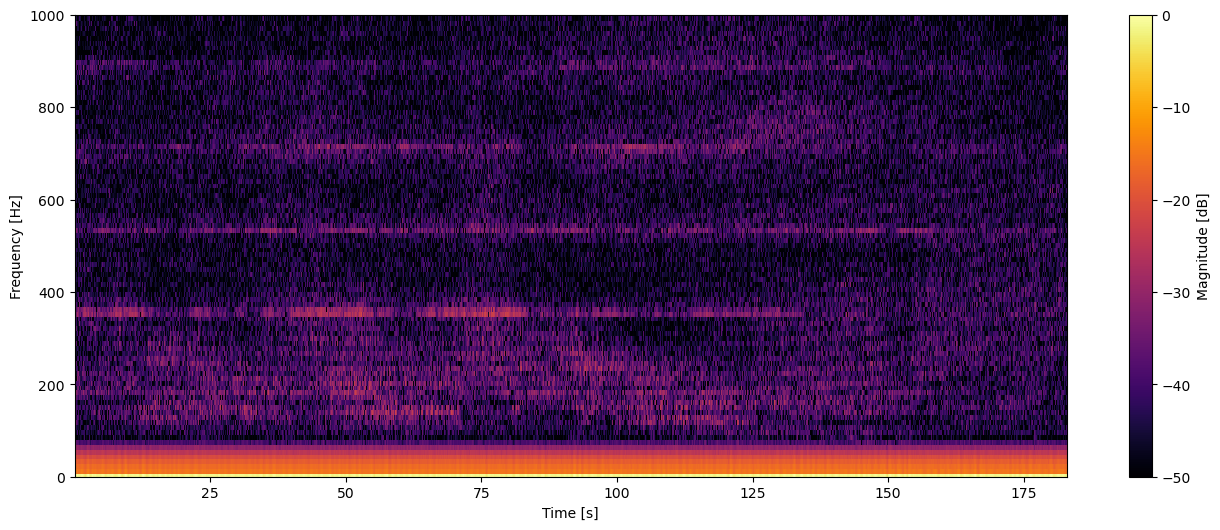

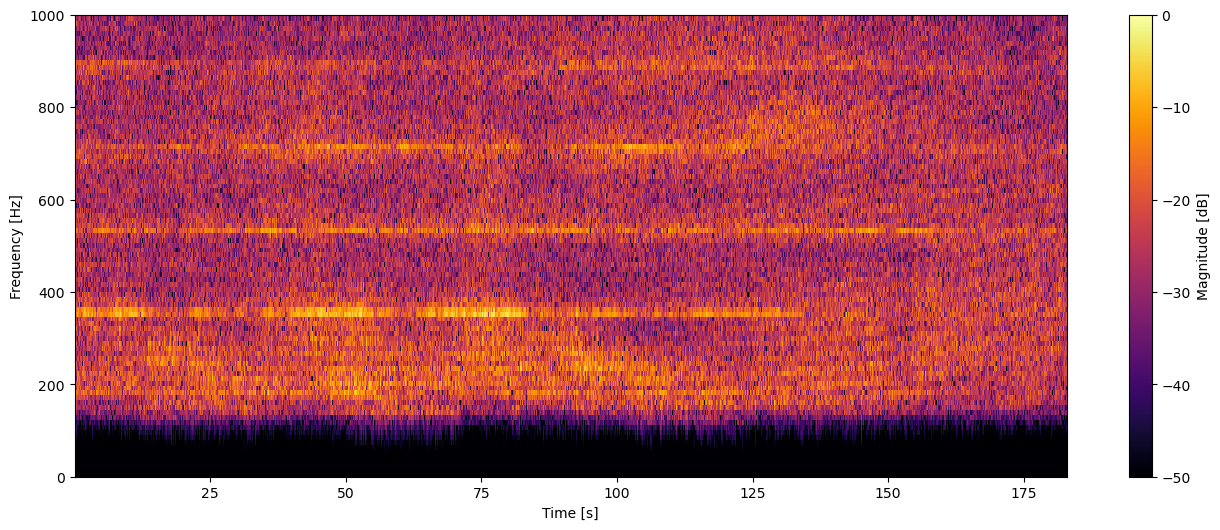

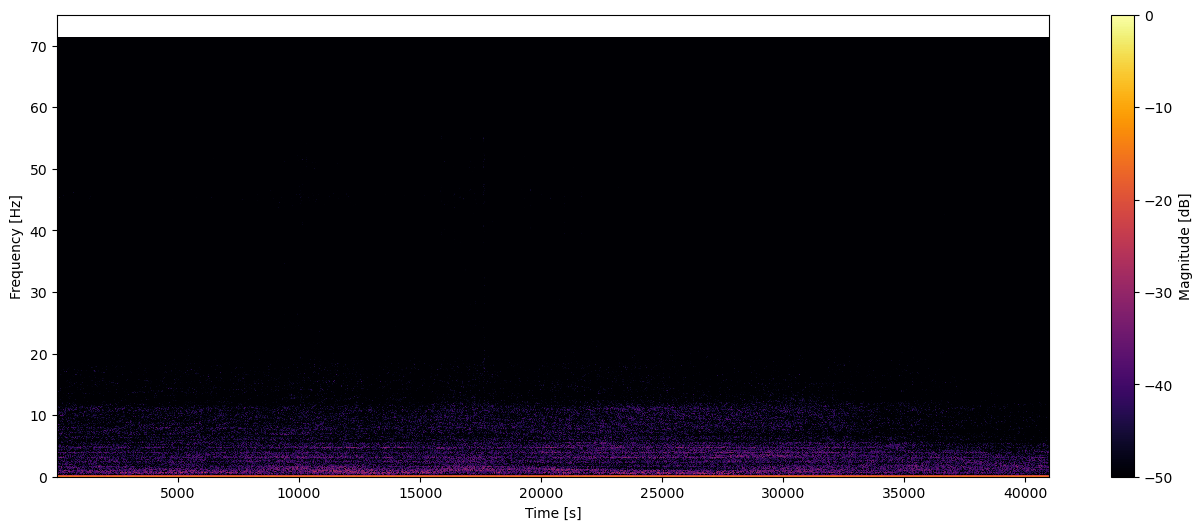

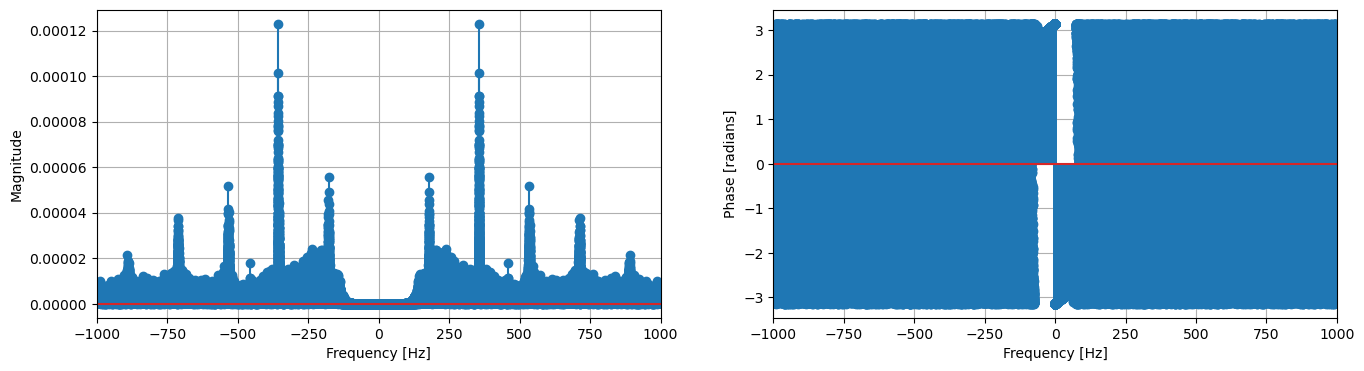

In [105]:
fmax = 1e3
n_samples = 3000

ok = plot_spectrogram(samples, times, sample_rate, n_samples, fmax)

x1 = butter_highpass_filter(samples, 150, sample_rate)
ok = plot_spectrogram(x1, times, sample_rate, n_samples, fmax)

ok = plot_spectrogram(samples, times, fs, n_samples, 75)

pk = plot_spectrum(x1, sample_rate, fmax)